# **Załadowanie potrzebnych bibliotek**

### Wyjaśnienie kodu

Ten kod importuje kilka bibliotek i modułów niezbędnych do analizy danych, wizualizacji oraz budowania, trenowania i oceny modelu sieci konwolucyjnej (CNN). Każda z tych bibliotek pełni określoną rolę w procesie przetwarzania danych i uczenia maszynowego.

#### Importy NumPy, Matplotlib i Seaborn:

1. **Importy NumPy:**
   - `import numpy as np`: Importuje bibliotekę NumPy, która jest używana do operacji numerycznych na tablicach. NumPy jest podstawową biblioteką do obliczeń naukowych w Pythonie, oferującą wsparcie dla dużych, wielowymiarowych tablic i macierzy oraz szeroki zestaw funkcji matematycznych do pracy z nimi.

2. **Importy Matplotlib:**
   - `import matplotlib.pyplot as plt`: Importuje bibliotekę Matplotlib do tworzenia wykresów i wizualizacji danych. Matplotlib jest wszechstronnym narzędziem do tworzenia statycznych, animowanych i interaktywnych wizualizacji w Pythonie.

3. **Importy Seaborn:**
   - `import seaborn as sns`: Importuje bibliotekę Seaborn, która jest używana do tworzenia bardziej zaawansowanych i estetycznych wizualizacji danych. Seaborn jest zbudowany na bazie Matplotlib i oferuje wyższy poziom abstrakcji dla tworzenia atrakcyjnych wizualizacji statystycznych.

#### Importy TensorFlow i Keras:

4. **Importy TensorFlow:**
   - `import tensorflow as tf`: Importuje bibliotekę TensorFlow, która jest używana do budowania i trenowania modeli uczenia maszynowego i głębokiego uczenia. TensorFlow jest wszechstronną biblioteką open-source do obliczeń numerycznych, która umożliwia łatwe tworzenie i trenowanie modeli głębokiego uczenia.

5. **Importy Keras:**
   - `from tensorflow.keras.preprocessing.image import ImageDataGenerator`: Importuje klasę `ImageDataGenerator` z modułu Keras w TensorFlow, która jest używana do generowania wsadowych danych obrazowych z augmentacją w locie. `ImageDataGenerator` umożliwia łatwe przekształcanie i augmentację obrazów podczas treningu modelu.
   - `from tensorflow.keras.models import Sequential`: Importuje klasę `Sequential` z modułu Keras w TensorFlow, która jest używana do tworzenia sekwencyjnych modeli sieci neuronowych. `Sequential` umożliwia łatwe budowanie modeli warstwa po warstwie.
   - `from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout`: Importuje różne warstwy z modułu Keras w TensorFlow, które są używane do budowania sieci konwolucyjnych:
     - `Conv2D`: Warstwa konwolucyjna 2D, która jest używana do ekstrakcji cech z obrazów.
     - `MaxPooling2D`: Warstwa maksymalnego próbkowania 2D, która jest używana do redukcji wymiarów cech i zmniejszenia liczby parametrów w sieci.
     - `Flatten`: Warstwa spłaszczająca, która przekształca wielowymiarowe dane wejściowe na jednowymiarowy wektor.
     - `Dense`: Warstwa gęsta (w pełni połączona), która jest używana do klasyfikacji na podstawie wyodrębnionych cech.
     - `Dropout`: Warstwa dropout, która jest używana do regularizacji modelu poprzez losowe wyłączanie neuronów podczas treningu, co pomaga w zapobieganiu przeuczeniu.
   - `from tensorflow.keras.callbacks import EarlyStopping`: Importuje klasę `EarlyStopping` z modułu Keras w TensorFlow, która jest używana do wczesnego zatrzymywania treningu modelu, gdy wydajność na zbiorze walidacyjnym przestaje się poprawiać. `EarlyStopping` pomaga w zapobieganiu przeuczeniu modelu.
   - `from tensorflow.keras.preprocessing import image`: Importuje moduł `image` z Keras, który jest używany do ładowania i przetwarzania obrazów. `image` zawiera funkcje do konwersji obrazów na tablice NumPy i przekształcania ich w odpowiedni format dla modelu.
   - `from tensorflow.keras.models import load_model`: Importuje funkcję `load_model` z Keras, która jest używana do ładowania zapisanych modeli. `load_model` umożliwia załadowanie modelu z pliku i używanie go do predykcji bez konieczności ponownego trenowania.

#### Importy z Scikit-learn:

6. **Importy z Scikit-learn:**
   - `from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score`: Importuje funkcje `confusion_matrix`, `accuracy_score`, `precision_score`, `recall_score` i `f1_score` z modułu Scikit-learn, które są używane do oceny wydajności modelu. Te funkcje umożliwiają obliczanie różnych metryk oceny, takich jak macierz konfuzji, dokładność, precyzja, czułość i F1-score, które są kluczowe do oceny jakości modelu klasyfikacyjnego.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **Definiowanie ścieżek do katalogów z danymi**

### Wyjaśnienie kodu

Ten kod definiuje ścieżki do katalogów zawierających dane treningowe, walidacyjne i testowe. Te ścieżki są używane do ładowania i przetwarzania obrazów z odpowiednich katalogów.

1. **Ścieżka do katalogu treningowego:**
   - `train_dir = 'chest_xray/train'`: Definiuje zmienną `train_dir`, która przechowuje ścieżkę do katalogu zawierającego dane treningowe. Katalog train zawiera obrazy rentgenowskie klatki piersiowej, które będą używane do trenowania modelu. Dane treningowe są używane do dopasowania modelu i nauczenia go rozpoznawania wzorców w danych.

2. **Ścieżka do katalogu walidacyjnego:**
   - `val_dir = 'chest_xray/val'`: Definiuje zmienną `val_dir`, która przechowuje ścieżkę do katalogu zawierającego dane walidacyjne. Katalog val zawiera obrazy rentgenowskie klatki piersiowej, które będą używane do walidacji modelu podczas treningu. Dane walidacyjne są używane do monitorowania wydajności modelu na danych, które nie były używane do treningu, co pomaga w ocenie, czy model nie przeucza się na danych treningowych.

3. **Ścieżka do katalogu testowego:**
   - `test_dir = 'chest_xray/test'`: Definiuje zmienną `test_dir`, która przechowuje ścieżkę do katalogu zawierającego dane testowe. Katalog test zawiera obrazy rentgenowskie klatki piersiowej, które będą używane do ostatecznej oceny modelu po zakończeniu treningu. Dane testowe są używane do oceny ogólnej wydajności modelu na nowych, niewidzianych wcześniej danych, co pozwala na sprawdzenie, jak dobrze model generalizuje.

In [27]:
train_dir = 'chest_xray/train'
val_dir = 'chest_xray/val'
test_dir = 'chest_xray/test'

# **Przygotowanie danych z augmentacją**

### Wyjaśnienie kodu

Ten kod przygotowuje dane obrazowe do treningu, walidacji i testowania modelu sieci konwolucyjnej, wykorzystując technikę augmentacji danych. Augmentacja danych polega na tworzeniu nowych, zmodyfikowanych wersji obrazów w locie, co pomaga zwiększyć różnorodność danych treningowych i zapobiega przeuczeniu modelu.

#### Przygotowanie generatora danych treningowych z augmentacją:

1. **Definicja generatora danych treningowych z augmentacją:**
   - `train_datagen = ImageDataGenerator(...)`: Tworzy instancję klasy `ImageDataGenerator` z różnymi parametrami augmentacji. `ImageDataGenerator` jest używany do generowania wsadowych danych obrazowych z augmentacją w locie.

2. **Parametry augmentacji:**
   - `rescale=1./255`: Skaluje wartości pikseli obrazów do zakresu [0, 1] poprzez podzielenie przez 255. Jest to standardowa praktyka w przetwarzaniu obrazów, która pomaga w normalizacji danych.
   - `rotation_range=20`: Losowo obraca obrazy w zakresie 20 stopni. Obracanie obrazów pomaga modelowi nauczyć się rozpoznawać obiekty niezależnie od ich orientacji.
   - `width_shift_range=0.2`: Losowo przesuwa obrazy w poziomie w zakresie 20% szerokości obrazu. Przesuwanie obrazów pomaga modelowi nauczyć się rozpoznawać obiekty w różnych pozycjach poziomych.
   - `height_shift_range=0.2`: Losowo przesuwa obrazy w pionie w zakresie 20% wysokości obrazu. Przesuwanie obrazów pomaga modelowi nauczyć się rozpoznawać obiekty w różnych pozycjach pionowych.
   - `shear_range=0.2`: Losowo stosuje transformację ścinania do obrazów w zakresie 20%. Transformacja ścinania zmienia kształt obrazu, co pomaga modelowi nauczyć się rozpoznawać obiekty niezależnie od ich kształtu.
   - `zoom_range=0.2`: Losowo powiększa lub pomniejsza obrazy w zakresie 20%. Zoomowanie obrazów pomaga modelowi nauczyć się rozpoznawać obiekty w różnych skalach.
   - `horizontal_flip=True`: Losowo odwraca obrazy w poziomie. Odwracanie obrazów pomaga modelowi nauczyć się rozpoznawać obiekty niezależnie od ich orientacji poziomej.
   - `fill_mode='nearest'`: Określa sposób wypełniania pikseli poza granicami obrazu po zastosowaniu transformacji. `nearest` oznacza, że piksele poza granicami obrazu są wypełniane wartościami najbliższych pikseli.

#### Przygotowanie generatorów danych walidacyjnych i testowych:

3. **Definicja generatora danych walidacyjnych:**
   - `val_datagen = ImageDataGenerator(rescale=1./255)`: Tworzy instancję klasy `ImageDataGenerator` do przetwarzania danych walidacyjnych. Dane walidacyjne są skalowane do zakresu [0, 1], ale nie są poddawane augmentacji, ponieważ augmentacja jest zwykle stosowana tylko do danych treningowych.

4. **Definicja generatora danych testowych:**
   - `test_datagen = ImageDataGenerator(rescale=1./255)`: Tworzy instancję klasy `ImageDataGenerator` do przetwarzania danych testowych. Dane testowe są skalowane do zakresu [0, 1], ale nie są poddawane augmentacji, ponieważ augmentacja jest zwykle stosowana tylko do danych treningowych.

#### Tworzenie generatorów danych:

5. **Tworzenie generatora danych treningowych:**
   - `train_generator = train_datagen.flow_from_directory(...)`: Tworzy generator danych treningowych z katalogu `train_dir` za pomocą `train_datagen`. Generator ten będzie w locie przetwarzał i augmentował obrazy podczas treningu modelu.
   - `target_size=(150, 150)`: Ustawia docelowy rozmiar obrazów na 150x150 pikseli. Wszystkie obrazy zostaną przeskalowane do tego rozmiaru.
   - `batch_size=32`: Ustawia rozmiar wsadu na 32 obrazy. Generator będzie dostarczał wsady po 32 obrazy do modelu podczas treningu.
   - `class_mode='binary'`: Ustawia tryb klasyfikacji na binarny. Oznacza to, że generator będzie dostarczał etykiety binarne (0 lub 1) dla obrazów, co jest odpowiednie dla problemu klasyfikacji binarnej (zdrowy vs. zapalenie płuc).

6. **Tworzenie generatora danych walidacyjnych:**
   - `val_generator = val_datagen.flow_from_directory(...)`: Tworzy generator danych walidacyjnych z katalogu `val_dir` za pomocą `val_datagen`. Generator ten będzie dostarczał przetworzone obrazy do modelu podczas walidacji.
   - `target_size=(150, 150)`: Ustawia docelowy rozmiar obrazów na 150x150 pikseli.
   - `batch_size=32`: Ustawia rozmiar wsadu na 32 obrazy.
   - `class_mode='binary'`: Ustawia tryb klasyfikacji na binarny.

7. **Tworzenie generatora danych testowych:**
   - `test_generator = test_datagen.flow_from_directory(...)`: Tworzy generator danych testowych z katalogu `test_dir` za pomocą `test_datagen`. Generator ten będzie dostarczał przetworzone obrazy do modelu podczas testowania.
   - `target_size=(150, 150)`: Ustawia docelowy rozmiar obrazów na 150x150 pikseli.
   - `batch_size=32`: Ustawia rozmiar wsadu na 32 obrazy.
   - `class_mode='binary'`: Ustawia tryb klasyfikacji na binarny.
   - `shuffle=False`: Wyłącza losowe mieszanie obrazów. Kolejność obrazów w generatorze testowym pozostaje taka sama, co jest ważne dla oceny modelu i porównywania wyników.

In [28]:
# Przygotowanie danych z augmentacją
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# **Wizualizacja danych**

### Wyjaśnienie kodu

Ten kod definiuje funkcję do wizualizacji obrazów wraz z ich etykietami oraz wykorzystuje tę funkcję do wyświetlenia przykładowych obrazów z danych treningowych. Wizualizacja danych jest ważnym krokiem w analizie danych, ponieważ pozwala na szybki podgląd struktury i zawartości danych, co może pomóc w zrozumieniu problemu i ocenie jakości danych.

#### Definicja funkcji `plot_images`:

1. **Definicja funkcji `plot_images`:**
   - `def plot_images(images_arr, labels_arr, class_names):`: Definiuje funkcję `plot_images`, która przyjmuje trzy argumenty:
     - `images_arr`: Tablica obrazów do wyświetlenia.
     - `labels_arr`: Tablica etykiet odpowiadających obrazom.
     - `class_names`: Lista nazw klas, które będą używane do etykietowania obrazów.

2. **Tworzenie siatki wykresów:**
   - `fig, axes = plt.subplots(1, 10, figsize=(20,20))`: Tworzy siatkę wykresów z 1 wierszem i 10 kolumnami, ustawiając rozmiar figury na 20x20 cali. `plt.subplots` zwraca obiekt figury (`fig`) i tablicę osi (`axes`), które będą używane do wyświetlania obrazów.

3. **Spłaszczanie tablicy osi:**
   - `axes = axes.flatten()`: Spłaszcza tablicę osi, aby uzyskać jednowymiarową listę osi. Jest to przydatne, gdy chcemy iterować po osiach w pętli.

4. **Iteracja po obrazach i etykietach:**
   - `for img, label, ax in zip(images_arr, labels_arr, axes):`: Iteruje po obrazach (`img`), etykietach (`label`) i osiach (`ax`) jednocześnie, używając funkcji `zip`. `zip` łączy elementy z kilku iterowalnych obiektów (w tym przypadku `images_arr`, `labels_arr` i `axes`) w pary, co pozwala na iterację po nich w jednej pętli.

5. **Wyświetlanie obrazów:**
   - `ax.imshow(img)`: Wyświetla obraz (`img`) na bieżącej osi (`ax`) za pomocą funkcji `imshow` z biblioteki Matplotlib. `imshow` wyświetla dane obrazowe jako obraz.
   - `ax.axis('off')`: Wyłącza osie (linie siatki i etykiety) na bieżącej osi (`ax`), aby uzyskać czystszy wygląd wykresu.
   - `ax.set_title(class_names[int(label)])`: Ustawia tytuł bieżącej osi (`ax`) na nazwę klasy odpowiadającą etykiecie (`label`). `int(label)` konwertuje etykietę na liczbę całkowitą, a `class_names[int(label)]` zwraca nazwę klasy z listy `class_names`.

6. **Dostosowanie układu wykresu:**
   - `plt.tight_layout()`: Dostosowuje odstępy między podwykresami, aby uniknąć nakładania się i zapewnić lepszy wygląd wykresu. `tight_layout` automatycznie dostosowuje parametry podwykresów, aby elementy wykresu nie nachodziły na siebie.

7. **Wyświetlanie wykresu:**
   - `plt.show()`: Wyświetla wykres z obrazami i etykietami. `show` renderuje wykres i wyświetla go na ekranie.

#### Wizualizacja przykładowych obrazów z danych treningowych:

8. **Definicja nazw klas:**
   - `class_names = ['Zdrowy', 'Zapalenie płuc']`: Definiuje listę nazw klas, które będą używane do etykietowania obrazów. W tym przypadku mamy dwie klasy: 'Zdrowy' i 'Zapalenie płuc'.

9. **Pobieranie przykładowych obrazów i etykiet:**
   - `sample_training_images, sample_training_labels = next(train_generator)`: Pobiera przykładowe obrazy i etykiety z generatora danych treningowych (`train_generator`) za pomocą funkcji `next`. `next(train_generator)` zwraca pierwszy wsad obrazów i etykiet z generatora.

10. **Wyświetlanie przykładowych obrazów:**
    - `plot_images(sample_training_images[:10], sample_training_labels[:10], class_names)`: Wywołuje funkcję `plot_images`, aby wyświetlić pierwsze 10 obrazów (`sample_training_images[:10]`) i odpowiadających im etykiet (`sample_training_labels[:10]`) z listą nazw klas (`class_names`). Funkcja `plot_images` wyświetla obrazy wraz z ich etykietami, co pozwala na szybki podgląd danych treningowych.

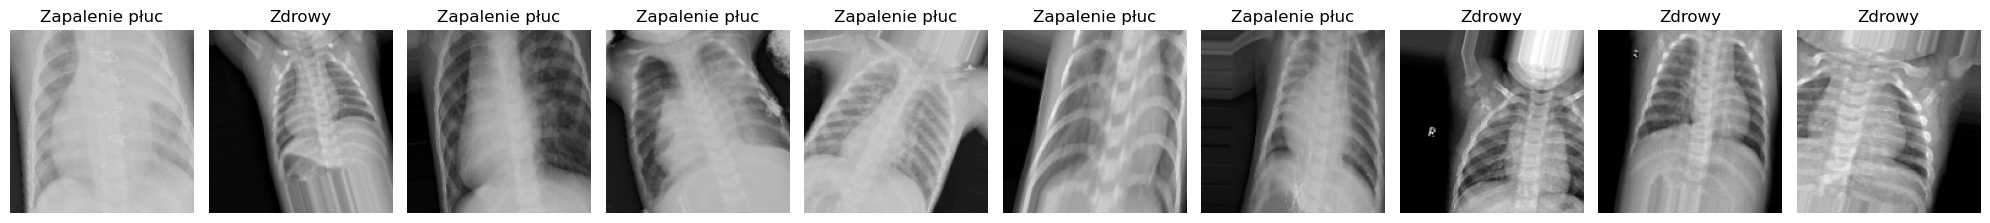

In [29]:
# Wizualizacja danych
def plot_images(images_arr, labels_arr, class_names):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, label, ax in zip(images_arr, labels_arr, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(class_names[int(label)])
    plt.tight_layout()
    plt.show()

class_names = ['Zdrowy', 'Zapalenie płuc']
sample_training_images, sample_training_labels = next(train_generator)
plot_images(sample_training_images[:10], sample_training_labels[:10], class_names)


# **Budowanie modelu sieci konwolucyjnej**

### Wyjaśnienie kodu

Ten kod buduje model sieci konwolucyjnej (CNN) za pomocą biblioteki Keras w TensorFlow. Model CNN jest używany do klasyfikacji obrazów, w tym przypadku do rozpoznawania, czy osoba ma zapalenie płuc, czy jest zdrowa. Model składa się z kilku warstw konwolucyjnych, warstw maksymalnego próbkowania, warstw dropout, warstwy spłaszczającej oraz warstw gęstych.

#### Definicja modelu sekwencyjnego:

1. **Definicja modelu sekwencyjnego:**
   - `model = Sequential([...])`: Tworzy instancję klasy `Sequential`, która jest używana do budowania sekwencyjnych modeli sieci neuronowych. Model sekwencyjny pozwala na dodawanie warstw w kolejności, w jakiej będą przetwarzane dane.

#### Dodawanie warstw do modelu:

2. **Pierwsza warstwa konwolucyjna:**
   - `Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))`: Dodaje warstwę konwolucyjną 2D z 32 filtrami, rozmiarem jądra (kernel size) 3x3, funkcją aktywacji ReLU oraz kształtem wejściowym (150, 150, 3). Warstwa konwolucyjna jest używana do ekstrakcji cech z obrazów.
     - `32`: Liczba filtrów w warstwie konwolucyjnej.
     - `(3, 3)`: Rozmiar jądra konwolucyjnego.
     - `activation='relu'`: Funkcja aktywacji ReLU (Rectified Linear Unit), która wprowadza nieliniowość do modelu.
     - `input_shape=(150, 150, 3)`: Kształt wejściowy obrazów (150x150 pikseli, 3 kanały kolorów RGB).

3. **Pierwsza warstwa maksymalnego próbkowania:**
   - `MaxPooling2D((2, 2))`: Dodaje warstwę maksymalnego próbkowania 2D z rozmiarem okna 2x2. Warstwa maksymalnego próbkowania jest używana do redukcji wymiarów cech i zmniejszenia liczby parametrów w sieci.
     - `(2, 2)`: Rozmiar okna maksymalnego próbkowania.

4. **Pierwsza warstwa dropout:**
   - `Dropout(0.5)`: Dodaje warstwę dropout z współczynnikiem dropout 0.5. Warstwa dropout jest używana do regularizacji modelu poprzez losowe wyłączanie 50% neuronów podczas treningu, co pomaga w zapobieganiu przeuczeniu.

5. **Druga warstwa konwolucyjna:**
   - `Conv2D(64, (3, 3), activation='relu')`: Dodaje warstwę konwolucyjną 2D z 64 filtrami, rozmiarem jądra 3x3 i funkcją aktywacji ReLU.
     - `64`: Liczba filtrów w warstwie konwolucyjnej.
     - `(3, 3)`: Rozmiar jądra konwolucyjnego.
     - `activation='relu'`: Funkcja aktywacji ReLU.

6. **Druga warstwa maksymalnego próbkowania:**
   - `MaxPooling2D((2, 2))`: Dodaje warstwę maksymalnego próbkowania 2D z rozmiarem okna 2x2.

7. **Druga warstwa dropout:**
   - `Dropout(0.5)`: Dodaje warstwę dropout z współczynnikiem dropout 0.5.

8. **Trzecia warstwa konwolucyjna:**
   - `Conv2D(128, (3, 3), activation='relu')`: Dodaje warstwę konwolucyjną 2D z 128 filtrami, rozmiarem jądra 3x3 i funkcją aktywacji ReLU.
     - `128`: Liczba filtrów w warstwie konwolucyjnej.
     - `(3, 3)`: Rozmiar jądra konwolucyjnego.
     - `activation='relu'`: Funkcja aktywacji ReLU.

9. **Trzecia warstwa maksymalnego próbkowania:**
   - `MaxPooling2D((2, 2))`: Dodaje warstwę maksymalnego próbkowania 2D z rozmiarem okna 2x2.

10. **Trzecia warstwa dropout:**
    - `Dropout(0.5)`: Dodaje warstwę dropout z współczynnikiem dropout 0.5.

11. **Warstwa spłaszczająca:**
    - `Flatten()`: Dodaje warstwę spłaszczającą, która przekształca wielowymiarowe dane wejściowe na jednowymiarowy wektor. Warstwa spłaszczająca jest używana przed warstwami gęstymi.

12. **Pierwsza warstwa gęsta:**
    - `Dense(512, activation='relu')`: Dodaje warstwę gęstą (w pełni połączoną) z 512 neuronami i funkcją aktywacji ReLU. Warstwa gęsta jest używana do klasyfikacji na podstawie wyodrębnionych cech.
      - `512`: Liczba neuronów w warstwie gęstej.
      - `activation='relu'`: Funkcja aktywacji ReLU.

13. **Czwarta warstwa dropout:**
    - `Dropout(0.5)`: Dodaje warstwę dropout z współczynnikiem dropout 0.5.

14. **Warstwa wyjściowa:**
    - `Dense(1, activation='sigmoid')`: Dodaje warstwę gęstą (w pełni połączoną) z 1 neuronem i funkcją aktywacji sigmoid. Warstwa wyjściowa jest używana do przewidywania prawdopodobieństwa klasy (zdrowy vs. zapalenie płuc).
      - `1`: Liczba neuronów w warstwie wyjściowej.
      - `activation='sigmoid'`: Funkcja aktywacji sigmoid, która zwraca wartość w zakresie [0, 1], co jest odpowiednie dla problemu klasyfikacji binarnej.

#### Kompilacja modelu:

15. **Kompilacja modelu:**
    - `model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])`: Kompiluje model, określając optymalizator, funkcję straty i metryki oceny.
      - `optimizer='adam'`: Używa optymalizatora Adam, który jest popularnym algorytmem optymalizacji w uczeniu maszynowym.
      - `loss='binary_crossentropy'`: Używa funkcji straty binary_crossentropy, która jest odpowiednia dla problemu klasyfikacji binarnej.
      - `metrics=['accuracy']`: Używa dokładności (accuracy) jako metryki oceny modelu.

#### Wyświetlenie podsumowania modelu:

16. **Wyświetlenie podsumowania modelu:**
    - `model.summary()`: Wyświetla podsumowanie modelu, które zawiera informacje o warstwach, kształtach wyjściowych i liczbie parametrów w każdej warstwie. Podsumowanie modelu pomaga zrozumieć strukturę modelu i liczbę parametrów do trenowania.

In [30]:
# Budowanie modelu sieci konwolucyjnej
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

# **Trenowanie modelu z wczesnym zatrzymywaniem**

### Wyjaśnienie kodu

Ten kod definiuje mechanizm wczesnego zatrzymywania (early stopping) oraz trenuje model sieci konwolucyjnej (CNN) na danych treningowych, walidując go na danych walidacyjnych. Wczesne zatrzymywanie jest techniką używaną do zapobiegania przeuczeniu modelu poprzez zatrzymanie treningu, gdy wydajność na zbiorze walidacyjnym przestaje się poprawiać.

#### Definicja mechanizmu wczesnego zatrzymywania:

1. **Definicja mechanizmu wczesnego zatrzymywania:**
   - `early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)`: Tworzy instancję klasy `EarlyStopping` z określonymi parametrami.
     - `monitor='val_loss'`: Określa, że monitorowana będzie funkcja straty na zbiorze walidacyjnym (`val_loss`). Trening zostanie zatrzymany, gdy `val_loss` przestanie się poprawiać.
     - `patience=5`: Określa liczbę epok, przez które model może nie poprawiać się, zanim trening zostanie zatrzymany. Jeśli `val_loss` nie poprawi się przez 5 kolejnych epok, trening zostanie zatrzymany.
     - `restore_best_weights=True`: Określa, że po zatrzymaniu treningu model przywróci wagi z epoki, w której `val_loss` była najniższa. Dzięki temu model będzie miał najlepsze możliwe wagi.

#### Trenowanie modelu:

2. **Trenowanie modelu:**
   - `history = model.fit(...)`: Trenuje model na danych treningowych, walidując go na danych walidacyjnych. Funkcja `fit` wykonuje trening modelu przez określoną liczbę epok, używając generatorów danych treningowych i walidacyjnych.
     - `train_generator`: Generator danych treningowych, który dostarcza wsady obrazów i etykiet do modelu podczas treningu.
     - `steps_per_epoch=train_generator.samples // train_generator.batch_size`: Określa liczbę kroków na epokę. Jest to liczba próbek w generatorze danych treningowych podzielona przez rozmiar wsadu. Oznacza to, że każda epoka będzie składała się z tylu kroków, ile potrzeba, aby przetworzyć wszystkie próbki w generatorze danych treningowych.
     - `validation_data=val_generator`: Generator danych walidacyjnych, który dostarcza wsady obrazów i etykiet do modelu podczas walidacji.
     - `validation_steps=val_generator.samples // val_generator.batch_size`: Określa liczbę kroków walidacyjnych na epokę. Jest to liczba próbek w generatorze danych walidacyjnych podzielona przez rozmiar wsadu. Oznacza to, że każda epoka będzie miała tyle kroków walidacyjnych, ile potrzeba, aby przetworzyć wszystkie próbki w generatorze danych walidacyjnych.
     - `epochs=2`: Określa maksymalną liczbę epok treningowych. Model będzie trenowany przez maksymalnie 2 epoki, chyba że mechanizm wczesnego zatrzymywania zatrzyma trening wcześniej.
     - `callbacks=[early_stopping]`: Określa listę callbacków, które będą używane podczas treningu. W tym przypadku używany jest mechanizm wczesnego zatrzymywania (`early_stopping`), który monitoruje `val_loss` i zatrzymuje trening, gdy wydajność na zbiorze walidacyjnym przestaje się poprawiać.

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=40,
    callbacks=[early_stopping]
)

Epoch 1/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 95s 576ms/step - accuracy: 0.6955 - loss: 1.4406 - val_accuracy: 0.5000 - val_loss: 0.6800
Epoch 2/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 91s 555ms/step - accuracy: 0.7380 - loss: 0.5167 - val_accuracy: 0.8125 - val_loss: 0.6862
Epoch 3/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 88s 542ms/step - accuracy: 0.7724 - loss: 0.4400 - val_accuracy: 0.6250 - val_loss: 0.7090
Epoch 4/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 88s 542ms/step - accuracy: 0.8297 - loss: 0.3768 - val_accuracy: 0.7500 - val_loss: 0.5710
Epoch 5/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 96s 586ms/step - accuracy: 0.8481 - loss: 0.3404 - val_accuracy: 0.7500 - val_loss: 0.6389
Epoch 6/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 94s 576ms/step - accuracy: 0.8709 - loss: 0.3139 - val_accuracy: 0.5625 - val_loss: 0.7347
Epoch 7/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 89s 542ms/step - accuracy: 0.8595 - loss: 0.3227 - val_accuracy: 0.6875 - val_loss: 0.5456
Epoch 8/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 89s 547ms/step - accuracy: 0.8774 - loss: 0

# **Wizualizacja wyników treningu**

### Wyjaśnienie kodu

Ten kod wizualizuje wyniki treningu modelu, w tym dokładność i stratę zarówno dla zbioru treningowego, jak i walidacyjnego. Wizualizacja wyników treningu pomaga zrozumieć, jak model uczył się w czasie i czy wystąpiło przeuczenie lub niedouczenie.

#### Pobieranie historii treningu:

1. **Pobieranie dokładności treningowej:**
   - `acc = history.history['accuracy']`: Pobiera listę wartości dokładności (accuracy) dla zbioru treningowego z historii treningu (`history`). `history.history` jest słownikiem, który zawiera wartości metryk dla każdej epoki treningu.

2. **Pobieranie dokładności walidacyjnej:**
   - `val_acc = history.history['val_accuracy']`: Pobiera listę wartości dokładności (accuracy) dla zbioru walidacyjnego z historii treningu (`history`).

3. **Pobieranie straty treningowej:**
   - `loss = history.history['loss']`: Pobiera listę wartości straty (loss) dla zbioru treningowego z historii treningu (`history`).

4. **Pobieranie straty walidacyjnej:**
   - `val_loss = history.history['val_loss']`: Pobiera listę wartości straty (loss) dla zbioru walidacyjnego z historii treningu (`history`).

#### Definiowanie zakresu epok:

5. **Definiowanie zakresu epok:**
   - `epochs_range = range(len(acc))`: Tworzy zakres epok na podstawie długości listy wartości dokładności (`acc`). `range(len(acc))` zwraca zakres liczb od 0 do liczby epok minus 1, co jest używane do osi x na wykresach.

#### Tworzenie wykresów:

6. **Tworzenie figury:**
   - `plt.figure(figsize=(12, 8))`: Tworzy nową figurę o rozmiarze 12x8 cali. `figsize` określa rozmiar figury w calach.

7. **Tworzenie pierwszego podwykresu:**
   - `plt.subplot(1, 2, 1)`: Tworzy pierwszy podwykres w siatce 1x2 (1 wiersz, 2 kolumny). `subplot` umożliwia tworzenie wielu wykresów w jednej figurze.

8. **Rysowanie wykresu dokładności:**
   - `plt.plot(epochs_range, acc, label='Training Accuracy')`: Rysuje wykres dokładności treningowej na pierwszym podwykresie. `epochs_range` jest używane jako oś x, a `acc` jako oś y. `label='Training Accuracy'` dodaje etykietę do legendy.
   - `plt.plot(epochs_range, val_acc, label='Validation Accuracy')`: Rysuje wykres dokładności walidacyjnej na pierwszym podwykresie. `epochs_range` jest używane jako oś x, a `val_acc` jako oś y. `label='Validation Accuracy'` dodaje etykietę do legendy.
   - `plt.legend(loc='lower right')`: Dodaje legendę do wykresu w prawym dolnym rogu (`loc='lower right'`).
   - `plt.title('Training and Validation Accuracy')`: Ustawia tytuł pierwszego podwykresu na 'Training and Validation Accuracy'.

9. **Tworzenie drugiego podwykresu:**
   - `plt.subplot(1, 2, 2)`: Tworzy drugi podwykres w siatce 1x2 (1 wiersz, 2 kolumny).

10. **Rysowanie wykresu straty:**
    - `plt.plot(epochs_range, loss, label='Training Loss')`: Rysuje wykres straty treningowej na drugim podwykresie. `epochs_range` jest używane jako oś x, a `loss` jako oś y. `label='Training Loss'` dodaje etykietę do legendy.
    - `plt.plot(epochs_range, val_loss, label='Validation Loss')`: Rysuje wykres straty walidacyjnej na drugim podwykresie. `epochs_range` jest używane jako oś x, a `val_loss` jako oś y. `label='Validation Loss'` dodaje etykietę do legendy.
    - `plt.legend(loc='upper right')`: Dodaje legendę do wykresu w prawym górnym rogu (`loc='upper right'`).
    - `plt.title('Training and Validation Loss')`: Ustawia tytuł drugiego podwykresu na 'Training and Validation Loss'.

11. **Wyświetlenie wykresów:**
    - `plt.show()`: Wyświetla figurę z dwoma podwykresami. `show` renderuje wykresy i wyświetla je na ekranie.

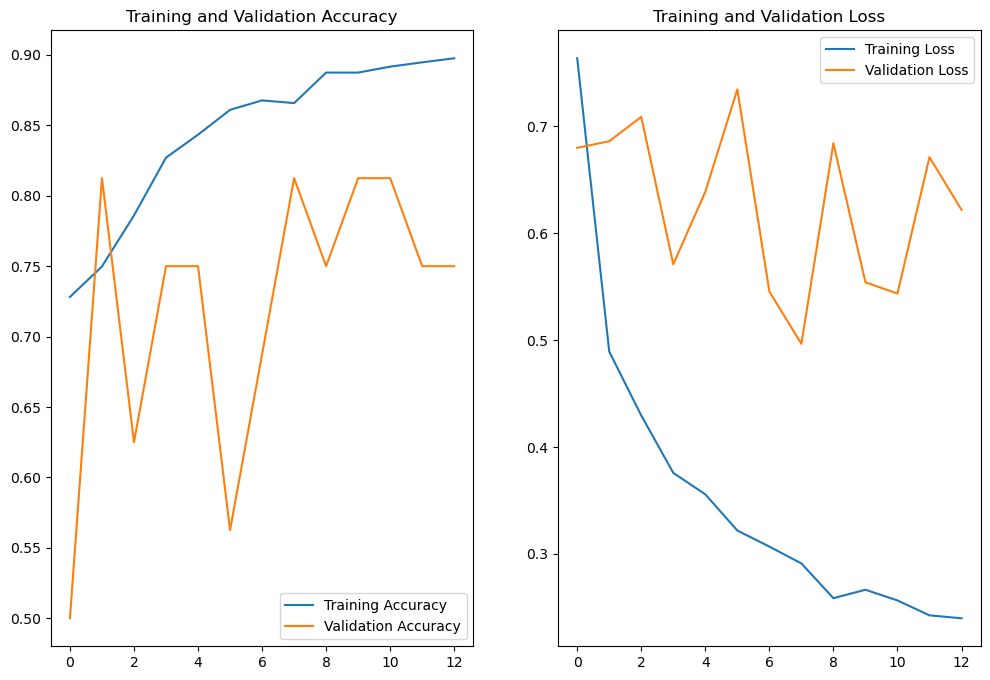

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Ocena modelu na zbiorze testowym**

### Wyjaśnienie kodu

Ten kod ocenia model sieci konwolucyjnej (CNN) na zbiorze testowym, oblicza różne metryki oceny i wyświetla wyniki. Ocena modelu na zbiorze testowym pozwala na sprawdzenie, jak dobrze model generalizuje na nowych, niewidzianych wcześniej danych.

#### Ocena modelu na zbiorze testowym:

1. **Ocena modelu:**
   - `test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)`: Ocena modelu na zbiorze testowym za pomocą generatora danych testowych (`test_generator`). Funkcja `evaluate` zwraca stratę (`test_loss`) i dokładność (`test_acc`) na zbiorze testowym.
     - `test_generator`: Generator danych testowych, który dostarcza wsady obrazów i etykiet do modelu podczas oceny.
     - `steps=test_generator.samples // test_generator.batch_size`: Określa liczbę kroków na epokę. Jest to liczba próbek w generatorze danych testowych podzielona przez rozmiar wsadu. Oznacza to, że każda epoka będzie składała się z tylu kroków, ile potrzeba, aby przetworzyć wszystkie próbki w generatorze danych testowych.

2. **Wyświetlenie dokładności na zbiorze testowym:**
   - `print(f"Test accuracy: {test_acc:.2f}")`: Wyświetla dokładność na zbiorze testowym (`test_acc`) z dwoma miejscami po przecinku. `f-string` (`f"..."`) umożliwia wstawienie wartości zmiennej (`test_acc`) bezpośrednio w ciąg znaków.

#### Predykcje na zbiorze testowym:

3. **Predykcje na zbiorze testowym:**
   - `y_pred = model.predict(test_generator)`: Generuje predykcje dla obrazów w zbiorze testowym za pomocą generatora danych testowych (`test_generator`). Funkcja `predict` zwraca prawdopodobieństwa przynależności do klasy dla każdego obrazu.

4. **Konwersja prawdopodobieństw na klasy:**
   - `y_pred_classes = np.where(y_pred > 0.5, 1, 0).flatten()`: Konwertuje prawdopodobieństwa (`y_pred`) na klasy binarne (0 lub 1). `np.where(y_pred > 0.5, 1, 0)` zwraca 1, jeśli prawdopodobieństwo jest większe niż 0.5, w przeciwnym razie zwraca 0. `flatten()` przekształca wynikową tablicę w jednowymiarowy wektor.

5. **Pobieranie rzeczywistych etykiet:**
   - `y_true = test_generator.classes`: Pobiera rzeczywiste etykiety klas dla obrazów w zbiorze testowym z generatora danych testowych (`test_generator`). `test_generator.classes` zwraca tablicę rzeczywistych etykiet.

#### Obliczanie metryk oceny:

6. **Obliczanie dokładności:**
   - `accuracy = accuracy_score(y_true, y_pred_classes)`: Oblicza dokładność modelu, porównując rzeczywiste etykiety (`y_true`) z przewidywanymi etykietami (`y_pred_classes`). `accuracy_score` zwraca stosunek liczby poprawnych przewidywań do całkowitej liczby przypadków.

7. **Obliczanie precyzji:**
   - `precision = precision_score(y_true, y_pred_classes)`: Oblicza precyzję modelu, porównując rzeczywiste etykiety (`y_true`) z przewidywanymi etykietami (`y_pred_classes`). `precision_score` zwraca stosunek liczby prawdziwych pozytywnych wyników do sumy prawdziwych i fałszywych pozytywnych wyników.

8. **Obliczanie czułości:**
   - `recall = recall_score(y_true, y_pred_classes)`: Oblicza czułość (recall) modelu, porównując rzeczywiste etykiety (`y_true`) z przewidywanymi etykietami (`y_pred_classes`). `recall_score` zwraca stosunek liczby prawdziwych pozytywnych wyników do sumy prawdziwych pozytywnych i fałszywych negatywnych wyników.

9. **Obliczanie F1-score:**
   - `f1 = f1_score(y_true, y_pred_classes)`: Oblicza F1-score modelu, porównując rzeczywiste etykiety (`y_true`) z przewidywanymi etykietami (`y_pred_classes`). `f1_score` zwraca średnią harmoniczną precyzji i czułości.

#### Wyświetlenie metryk oceny:

10. **Wyświetlenie dokładności:**
    - `print(f"Dokładność (Accuracy): {accuracy:.2f}")`: Wyświetla dokładność modelu (`accuracy`) z dwoma miejscami po przecinku.

11. **Wyświetlenie precyzji:**
    - `print(f"Precyzja (Precision): {precision:.2f}")`: Wyświetla precyzję modelu (`precision`) z dwoma miejscami po przecinku.

12. **Wyświetlenie czułości:**
    - `print(f"Czułość (Recall): {recall:.2f}")`: Wyświetla czułość modelu (`recall`) z dwoma miejscami po przecinku.

13. **Wyświetlenie F1-score:**
    - `print(f"F1-score: {f1:.2f}")`: Wyświetla F1-score modelu (`f1`) z dwoma miejscami po przecinku.

In [33]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test accuracy: {test_acc:.2f}")

y_pred = model.predict(test_generator)
y_pred_classes = np.where(y_pred > 0.5, 1, 0).flatten()
y_true = test_generator.classes

accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)

print(f"Dokładność (Accuracy): {accuracy:.2f}")
print(f"Precyzja (Precision): {precision:.2f}")
print(f"Czułość (Recall): {recall:.2f}")
print(f"F1-score: {f1:.2f}")

d:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 246ms/step - accuracy: 0.8582 - loss: 0.4005
Test accuracy: 0.82
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step
Dokładność (Accuracy): 0.82
Precyzja (Precision): 0.92
Czułość (Recall): 0.78
F1-score: 0.84


# **Wizualizacja macierzy konfuzji**

### Wyjaśnienie kodu

Ten kod oblicza macierz konfuzji dla wyników predykcji modelu na zbiorze testowym i wizualizuje ją za pomocą biblioteki Seaborn. Macierz konfuzji jest narzędziem do oceny wydajności modelu klasyfikacyjnego, które pokazuje liczbę prawdziwych pozytywnych, prawdziwych negatywnych, fałszywych pozytywnych i fałszywych negatywnych wyników.

#### Obliczanie macierzy konfuzji:

1. **Obliczanie macierzy konfuzji:**
   - `conf_matrix = confusion_matrix(y_true, y_pred_classes)`: Oblicza macierz konfuzji na podstawie rzeczywistych etykiet (`y_true`) i przewidywanych etykiet (`y_pred_classes`). `confusion_matrix` zwraca macierz, w której wiersze reprezentują rzeczywiste klasy, a kolumny reprezentują przewidywane klasy. Każda komórka macierzy zawiera liczbę przypadków dla danej kombinacji rzeczywistej i przewidywanej klasy.

#### Tworzenie wykresu macierzy konfuzji:

2. **Tworzenie figury:**
   - `plt.figure(figsize=(10, 8))`: Tworzy nową figurę o rozmiarze 10x8 cali. `figsize` określa rozmiar figury w calach.

3. **Tworzenie mapy cieplnej macierzy konfuzji:**
   - `sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Zdrowy', 'Zapalenie płuc'], yticklabels=['Zdrowy', 'Zapalenie płuc'])`: Tworzy mapę cieplną macierzy konfuzji za pomocą biblioteki Seaborn.
     - `conf_matrix`: Macierz konfuzji do wizualizacji.
     - `annot=True`: Dodaje adnotacje z wartościami liczbowymi do komórek macierzy.
     - `fmt='d'`: Formatuje wartości liczbowe jako liczby całkowite.
     - `cmap='Blues'`: Ustawia kolorystykę mapy cieplnej na odcienie niebieskiego.
     - `xticklabels=['Zdrowy', 'Zapalenie płuc']`: Ustawia etykiety osi x na 'Zdrowy' i 'Zapalenie płuc'.
     - `yticklabels=['Zdrowy', 'Zapalenie płuc']`: Ustawia etykiety osi y na 'Zdrowy' i 'Zapalenie płuc'.

4. **Ustawienie etykiety osi x:**
   - `plt.xlabel('Przewidywane')`: Ustawia etykietę osi x na 'Przewidywane', co wskazuje, że kolumny macierzy reprezentują przewidywane klasy.

5. **Ustawienie etykiety osi y:**
   - `plt.ylabel('Rzeczywiste')`: Ustawia etykietę osi y na 'Rzeczywiste', co wskazuje, że wiersze macierzy reprezentują rzeczywiste klasy.

6. **Ustawienie tytułu wykresu:**
   - `plt.title("Macierz konfuzji")`: Ustawia tytuł wykresu na 'Macierz konfuzji'.

7. **Wyświetlenie wykresu:**
   - `plt.show()`: Wyświetla figurę z mapą cieplną macierzy konfuzji. `show` renderuje wykres i wyświetla go na ekranie.

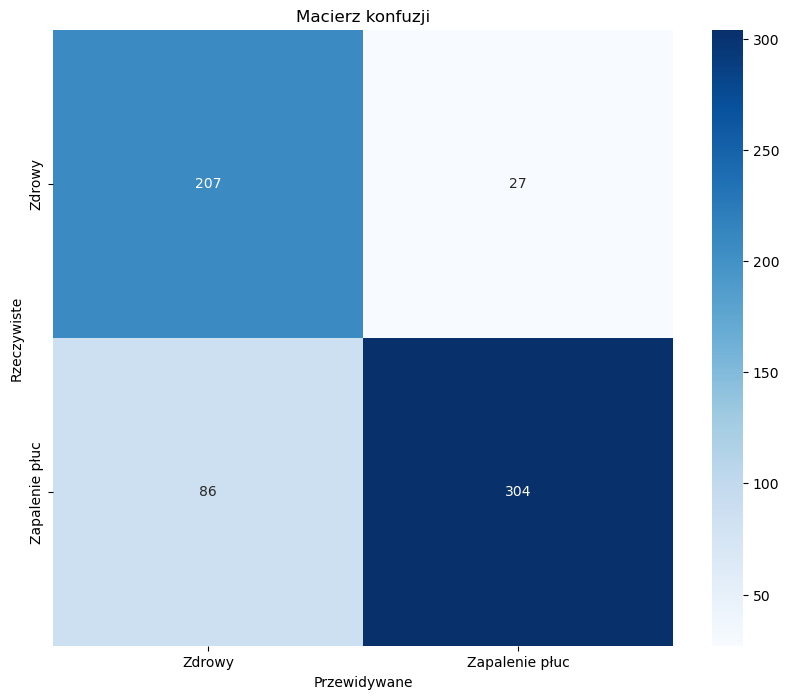

In [34]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Zdrowy', 'Zapalenie płuc'], yticklabels=['Zdrowy', 'Zapalenie płuc'])
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.title("Macierz konfuzji")
plt.show()

# **Zapisanie modelu**

### Wyjaśnienie kodu

Ten kod zapisuje wytrenowany model sieci konwolucyjnej (CNN) do pliku, aby można go było później załadować i używać do predykcji bez konieczności ponownego trenowania. Zapisanie modelu jest przydatne, gdy chcemy udostępnić wytrenowany model innym użytkownikom lub używać go w różnych aplikacjach.

1. **Zapisanie modelu:**
   - `model.save('pneumonia_detection_model.h5')`: Zapisuje wytrenowany model do pliku o nazwie `pneumonia_detection_model.h5`. Plik `.h5` jest formatem HDF5, który jest popularnym formatem do przechowywania dużych ilości danych. Funkcja `save` zapisuje całą architekturę modelu, wagi i konfigurację treningu, co pozwala na łatwe załadowanie modelu w przyszłości.

In [35]:
model.save('pneumonia_detection_model.h5')

# **Wykonanie predykcji na załadowanym modelu**

### Wyjaśnienie kodu

Ten kod definiuje funkcję do wykonywania predykcji na załadowanym modelu oraz używa tej funkcji do przewidywania klasy dla kilku obrazów. Funkcja `predict_image` ładuje zapisany model, przetwarza obraz i wykonuje predykcję, zwracając nazwę przewidywanej klasy.

1. **Definicja funkcji `predict_image`:**
   - `def predict_image(img_path, model_path, class_names):`: Definiuje funkcję `predict_image`, która przyjmuje trzy argumenty:
     - `img_path`: Ścieżka do obrazu, na którym ma być wykonana predykcja.
     - `model_path`: Ścieżka do zapisanego modelu.
     - `class_names`: Lista nazw klas, które będą używane do etykietowania predykcji.

2. **Ładowanie modelu:**
   - `model = load_model(model_path)`: Ładuje zapisany model z pliku `model_path` za pomocą funkcji `load_model` z biblioteki Keras. `load_model` zwraca model, który można używać do predykcji.

3. **Ładowanie i przetwarzanie obrazu:**
   - `img = image.load_img(img_path, target_size=(150, 150))`: Ładuje obraz z ścieżki `img_path` i przeskalowuje go do rozmiaru 150x150 pikseli za pomocą funkcji `load_img` z biblioteki Keras.
   - `img_array = image.img_to_array(img)`: Konwertuje obraz na tablicę NumPy za pomocą funkcji `img_to_array` z biblioteki Keras.
   - `img_array = np.expand_dims(img_array, axis=0)`: Dodaje dodatkowy wymiar do tablicy obrazów, aby utworzyć wsad o rozmiarze 1. Jest to wymagane przez model Keras, który oczekuje wsadów danych.
   - `img_array /= 255.0`: Skaluje wartości pikseli obrazów do zakresu [0, 1] poprzez podzielenie przez 255. Jest to standardowa praktyka w przetwarzaniu obrazów.

4. **Wykonanie predykcji:**
   - `prediction = model.predict(img_array)`: Wykonuje predykcję na przetworzonym obrazie za pomocą modelu. `predict` zwraca prawdopodobieństwo przynależności do klasy dla obrazu.
   - `predicted_class = class_names[int(prediction > 0.5)]`: Konwertuje prawdopodobieństwo na klasę binarną (0 lub 1) i zwraca nazwę klasy z listy `class_names`. `int(prediction > 0.5)` zwraca 1, jeśli prawdopodobieństwo jest większe niż 0.5, w przeciwnym razie zwraca 0.

5. **Przykład użycia funkcji `predict_image`:**
   - `model_path = 'pneumonia_detection_model.h5'`: Ścieżka do zapisanego modelu.
   - `predicted_class1 = predict_image('zdrowe_pluca.jpg', model_path, class_names)`: Wykonuje predykcję na obrazie zdrowe_pluca.jpg za pomocą funkcji `predict_image` i zapisuje wynik do zmiennej `predicted_class1`.
   - `print(f"Predykcja: {predicted_class1}")`: Wyświetla wynik predykcji dla obrazu zdrowe_pluca.jpg.
   - `predicted_class2 = predict_image('zapalenie_pluc.jpg', model_path, class_names)`: Wykonuje predykcję na obrazie zapalenie_pluc.jpg za pomocą funkcji `predict_image` i zapisuje wynik do zmiennej `predicted_class2`.
   - `print(f"Predykcja: {predicted_class2}")`: Wyświetla wynik predykcji dla obrazu zapalenie_pluc.jpg.
   - `predicted_class3 = predict_image('stopy.jpg', model_path, class_names)`: Wykonuje predykcję na obrazie stopy.jpg za pomocą funkcji `predict_image` i zapisuje wynik do zmiennej `predicted_class3`.
   - `print(f"Predykcja: {predicted_class3}")`: Wyświetla wynik predykcji dla obrazu stopy.jpg.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


C:\Users\kubal\AppData\Local\Temp\ipykernel_29640\598359467.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_names[int(prediction[0] > 0.5)]


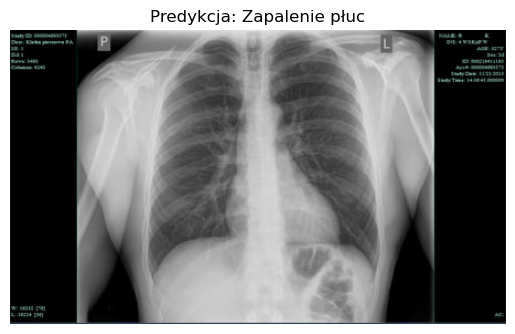

Predykcja: Zapalenie płuc


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


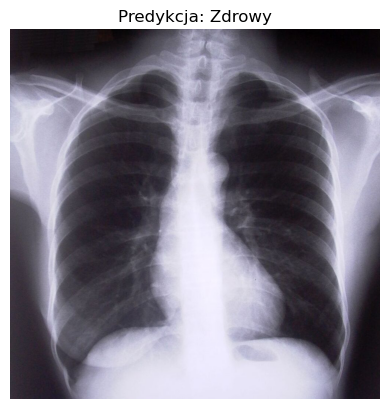

Predykcja: Zdrowy


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


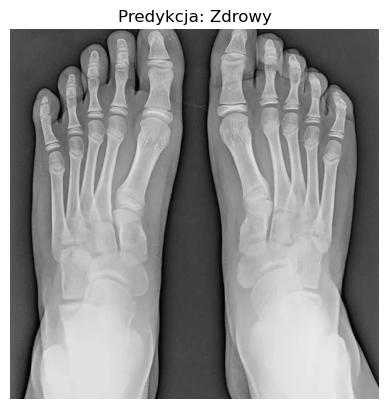

Predykcja: Zdrowy


In [40]:
def predict_image(img_path, model_path, class_names):
    # Ładowanie modelu
    model = load_model(model_path)
    
    # Ładowanie i przetwarzanie obrazu
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Wykonanie predykcji
    prediction = model.predict(img_array)
    predicted_class = class_names[int(prediction[0] > 0.5)]
    
    # Wyświetlenie obrazu z tytułem jako przewidywaną klasą
    plt.imshow(image.load_img(img_path))
    plt.title(f"Predykcja: {predicted_class}")
    plt.axis('off')
    plt.show()
    
    return predicted_class

# Definicja nazw klas
class_names = ['Zdrowy', 'Zapalenie płuc']

# Przykład użycia funkcji predict_image
model_path = 'pneumonia_detection_model.h5'  # Ścieżka do zapisanego modelu

# Przewidywanie i wyświetlanie obrazów
predicted_class1 = predict_image('zdrowe_pluca.jpg', model_path, class_names)
print(f"Predykcja: {predicted_class1}")

predicted_class2 = predict_image('zapalenie_pluc.jpg', model_path, class_names)
print(f"Predykcja: {predicted_class2}")

predicted_class3 = predict_image('stopy.jpg', model_path, class_names)
print(f"Predykcja: {predicted_class3}")